In [368]:
import numpy as np
np.random.seed(22520195)

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Random number generating function

In [369]:
def true_func(x):
    return np.sin(1 + x**2)

def generate_data(N, sigma=0.03):
    X_train = np.random.uniform(0, 1, N)  # Generate N data points between 0 and 1
    epsilon_train = np.random.normal(0, sigma, N)  # Normal distribution (sigma = 0.03)
    Y_train = true_func(X_train) + epsilon_train  # Calculate the target value y

    X_test = np.random.uniform(0, 1, N)  # Generate N data points between 0 and 1
    epsilon_test = np.random.normal(0, sigma, N)  # Normal distribution (sigma = 0.03)
    Y_test = true_func(X_test) + epsilon_test  # Calculate the target value y

    return (X_train, Y_train), (X_test, Y_test)

# Create **polynomial regression function** with **degree = degree**

In [370]:
def polynomial_regression(X, Y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, Y)

    return model

degrees = range(1, 10)

# Experiment 1: **n = 10**

In [371]:
N = 10

# Create three datasets
D1_train, D1_test = generate_data(N)
D2_train, D2_test = generate_data(N)
D3_train, D3_test = generate_data(N)

(X_train_1, Y_train_1), (X_test_1, Y_test_1) = D1_train, D1_test
(X_train_2, Y_train_2), (X_test_2, Y_test_2) = D2_train, D2_test
(X_train_3, Y_train_3), (X_test_3, Y_test_3) = D3_train, D3_test

# Plot the data

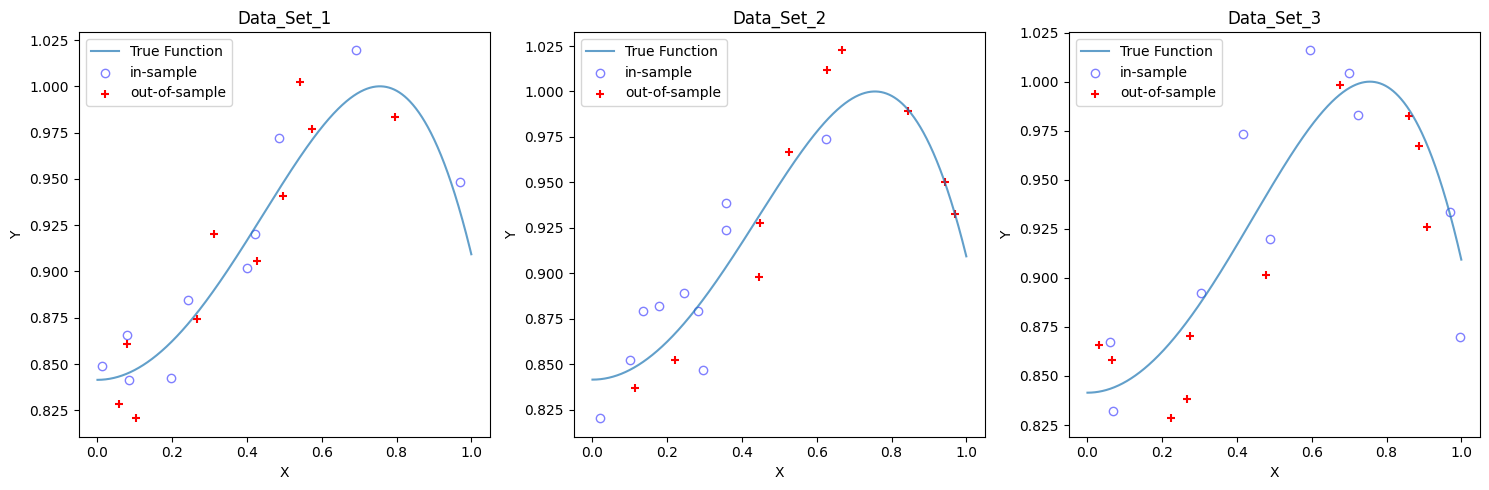

In [372]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    col = i % 3

    X_range = np.linspace(0, 1, 1000)
    axs[col].plot(X_range, true_func(X_range), label=f'True Function', alpha=0.7)

    if i == 0:
        axs[col].scatter(X_train_1, Y_train_1, label="in-sample", edgecolor='blue', color='white', alpha=0.5)
        axs[col].scatter(X_test_1, Y_test_1, label="out-of-sample", color='red', marker='+')
        axs[col].set_title(f'Data_Set_{i+1}')
    elif i == 1:
        axs[col].scatter(X_train_2, Y_train_2, label="in-sample", edgecolor='blue', color='white', alpha=0.5)
        axs[col].scatter(X_test_2, Y_test_2, label="out-of-sample", color='red', marker='+')
        axs[col].set_title(f'Data_Set_{i+1}')
    else:
        axs[col].scatter(X_train_3, Y_train_3, label="in-sample", edgecolor='blue', color='white', alpha=0.5)
        axs[col].scatter(X_test_3, Y_test_3, label="out-of-sample", color='red', marker='+')
        axs[col].set_title(f'Data_Set_{i+1}')

    axs[col].set_xlabel('X')
    axs[col].set_ylabel('Y')
    axs[col].legend()
plt.tight_layout()
plt.show()

# Predict D1, D2, D3 Dataset and plot its graph

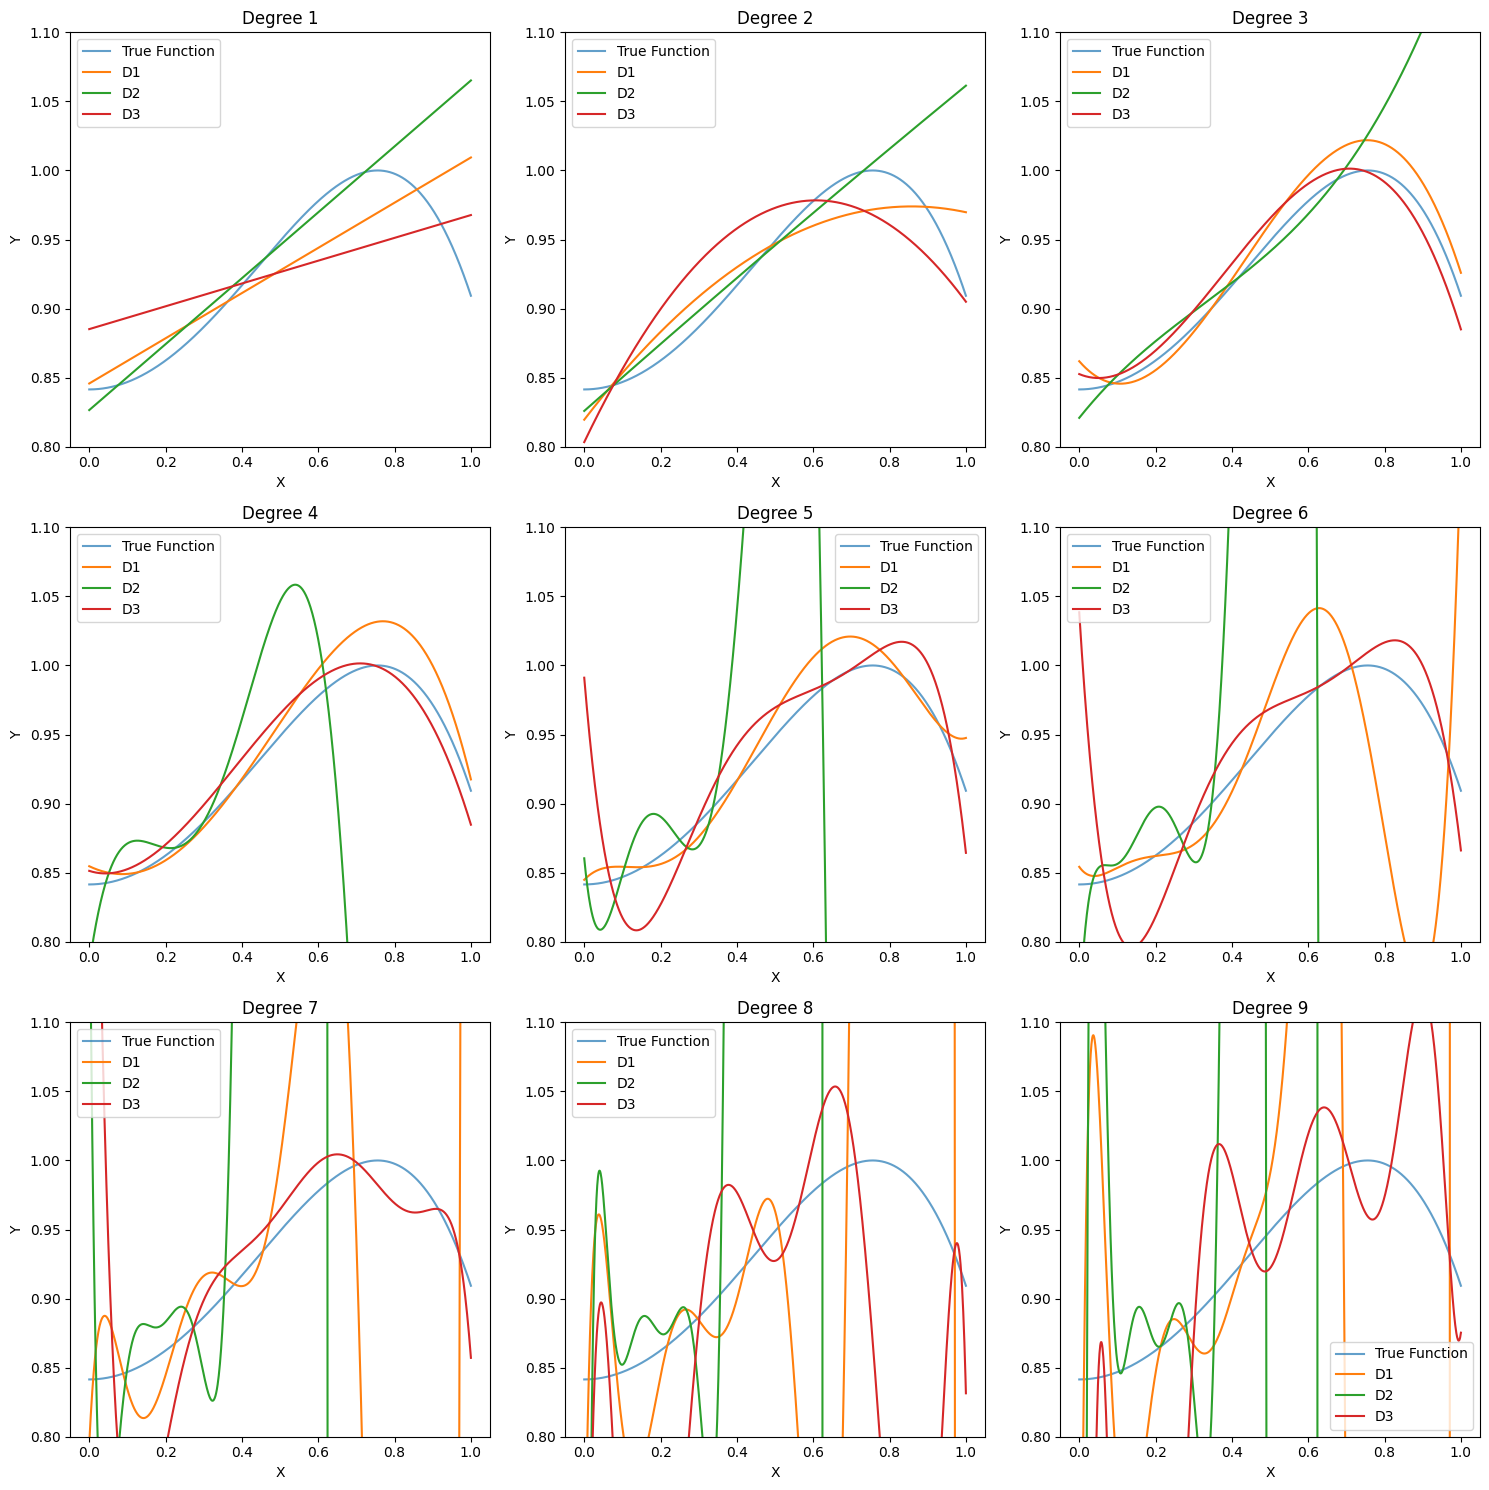

In [373]:
# Train the model with degree from 1 to 9 using D1 dataset

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, degree in enumerate(degrees):
    row = i // 3
    col = i % 3
    

    model_1 = polynomial_regression(X_train_1, Y_train_1, degree)
    model_2 = polynomial_regression(X_train_2, Y_train_2, degree)
    model_3 = polynomial_regression(X_train_3, Y_train_3, degree)

    X_range = np.linspace(0, 1, 1000)
    X_poly_range = PolynomialFeatures(degree=degree).fit_transform(X_range.reshape(-1, 1))

    Y_pred_1 = model_1.predict(X_poly_range)
    Y_pred_2 = model_2.predict(X_poly_range)
    Y_pred_3 = model_3.predict(X_poly_range)

    axs[row, col].plot(X_range, true_func(X_range), label=f'True Function', alpha=0.7)
    axs[row, col].plot(X_range, Y_pred_1, label=f'D1')
    axs[row, col].plot(X_range, Y_pred_2, label=f'D2')
    axs[row, col].plot(X_range, Y_pred_3, label=f'D3')
    axs[row, col].set_title(f'Degree {degree}')
    axs[row, col].set_xlabel('X')
    axs[row, col].set_ylabel('Y')
    axs[row, col].legend()
    axs[row, col].set_ylim(0.8, 1.1)  # Giới hạn trục y từ 0 đến 1 cho từng subplot

plt.tight_layout()
plt.show()


# Calculate the difference between E_in[D1] and E_out[D1]

In [374]:
# Calculate D1_in/out for every degree
X_train, Y_train = D1_train
X_test, Y_test = D1_test

E_in_values = []
E_out_values = []

for degree in degrees:
    # Train the model with degree = degree
    model = polynomial_regression(X_train, Y_train, degree)
    
    # Predict the output and calculate E_in
    Y_pred_train = model.predict(PolynomialFeatures(degree=degree).fit_transform(X_train.reshape(-1, 1)))
    E_in = mean_squared_error(Y_train, Y_pred_train)
    E_in_values.append(E_in)
    
    # Predict the output and calculate E_out
    Y_pred_test = model.predict(PolynomialFeatures(degree=degree).fit_transform(X_test.reshape(-1, 1)))
    E_out = mean_squared_error(Y_test, Y_pred_test)
    E_out_values.append(E_out)

# Drawing table
import pandas as pd

results_table = pd.DataFrame({
    'Degree': degrees,
    'E_in': E_in_values,
    'E_out': E_out_values
})

print(results_table)


   Degree          E_in      E_out
0       1  1.087851e-03   0.000960
1       2  7.641269e-04   0.000607
2       3  1.753882e-04   0.000550
3       4  1.623378e-04   0.000643
4       5  1.456969e-04   0.000583
5       6  1.210248e-04   0.001823
6       7  3.072799e-05   0.253549
7       8  7.867453e-06   3.855229
8       9  3.802252e-22  16.526997


# Experiment 2: **n=100**

In [375]:
N = 100

# Create three datasets
D1_train, D1_test = generate_data(N)
D2_train, D2_test = generate_data(N)
D3_train, D3_test = generate_data(N)

(X_train_1, Y_train_1), (X_test_1, Y_test_1) = D1_train, D1_test
(X_train_2, Y_train_2), (X_test_2, Y_test_2) = D2_train, D2_test
(X_train_3, Y_train_3), (X_test_3, Y_test_3) = D3_train, D3_test

# Plot the data

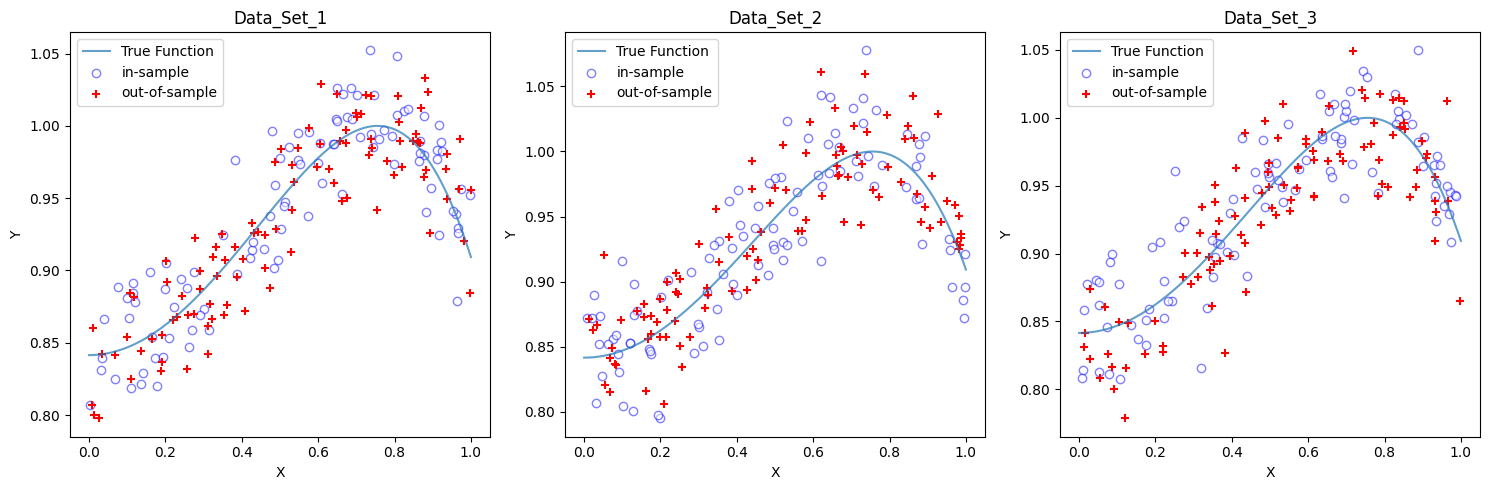

In [376]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    col = i % 3

    X_range = np.linspace(0, 1, 1000)
    axs[col].plot(X_range, true_func(X_range), label=f'True Function', alpha=0.7)

    if i == 0:
        axs[col].scatter(X_train_1, Y_train_1, label="in-sample", edgecolor='blue', color='white', alpha=0.5)
        axs[col].scatter(X_test_1, Y_test_1, label="out-of-sample", color='red', marker='+')
        axs[col].set_title(f'Data_Set_{i+1}')
    elif i == 1:
        axs[col].scatter(X_train_2, Y_train_2, label="in-sample", edgecolor='blue', color='white', alpha=0.5)
        axs[col].scatter(X_test_2, Y_test_2, label="out-of-sample", color='red', marker='+')
        axs[col].set_title(f'Data_Set_{i+1}')
    else:
        axs[col].scatter(X_train_3, Y_train_3, label="in-sample", edgecolor='blue', color='white', alpha=0.5)
        axs[col].scatter(X_test_3, Y_test_3, label="out-of-sample", color='red', marker='+')
        axs[col].set_title(f'Data_Set_{i+1}')

    axs[col].set_xlabel('X')
    axs[col].set_ylabel('Y')
    axs[col].legend()
plt.tight_layout()
plt.show()

# Predict D1, D2, D3 Dataset and plot its graph

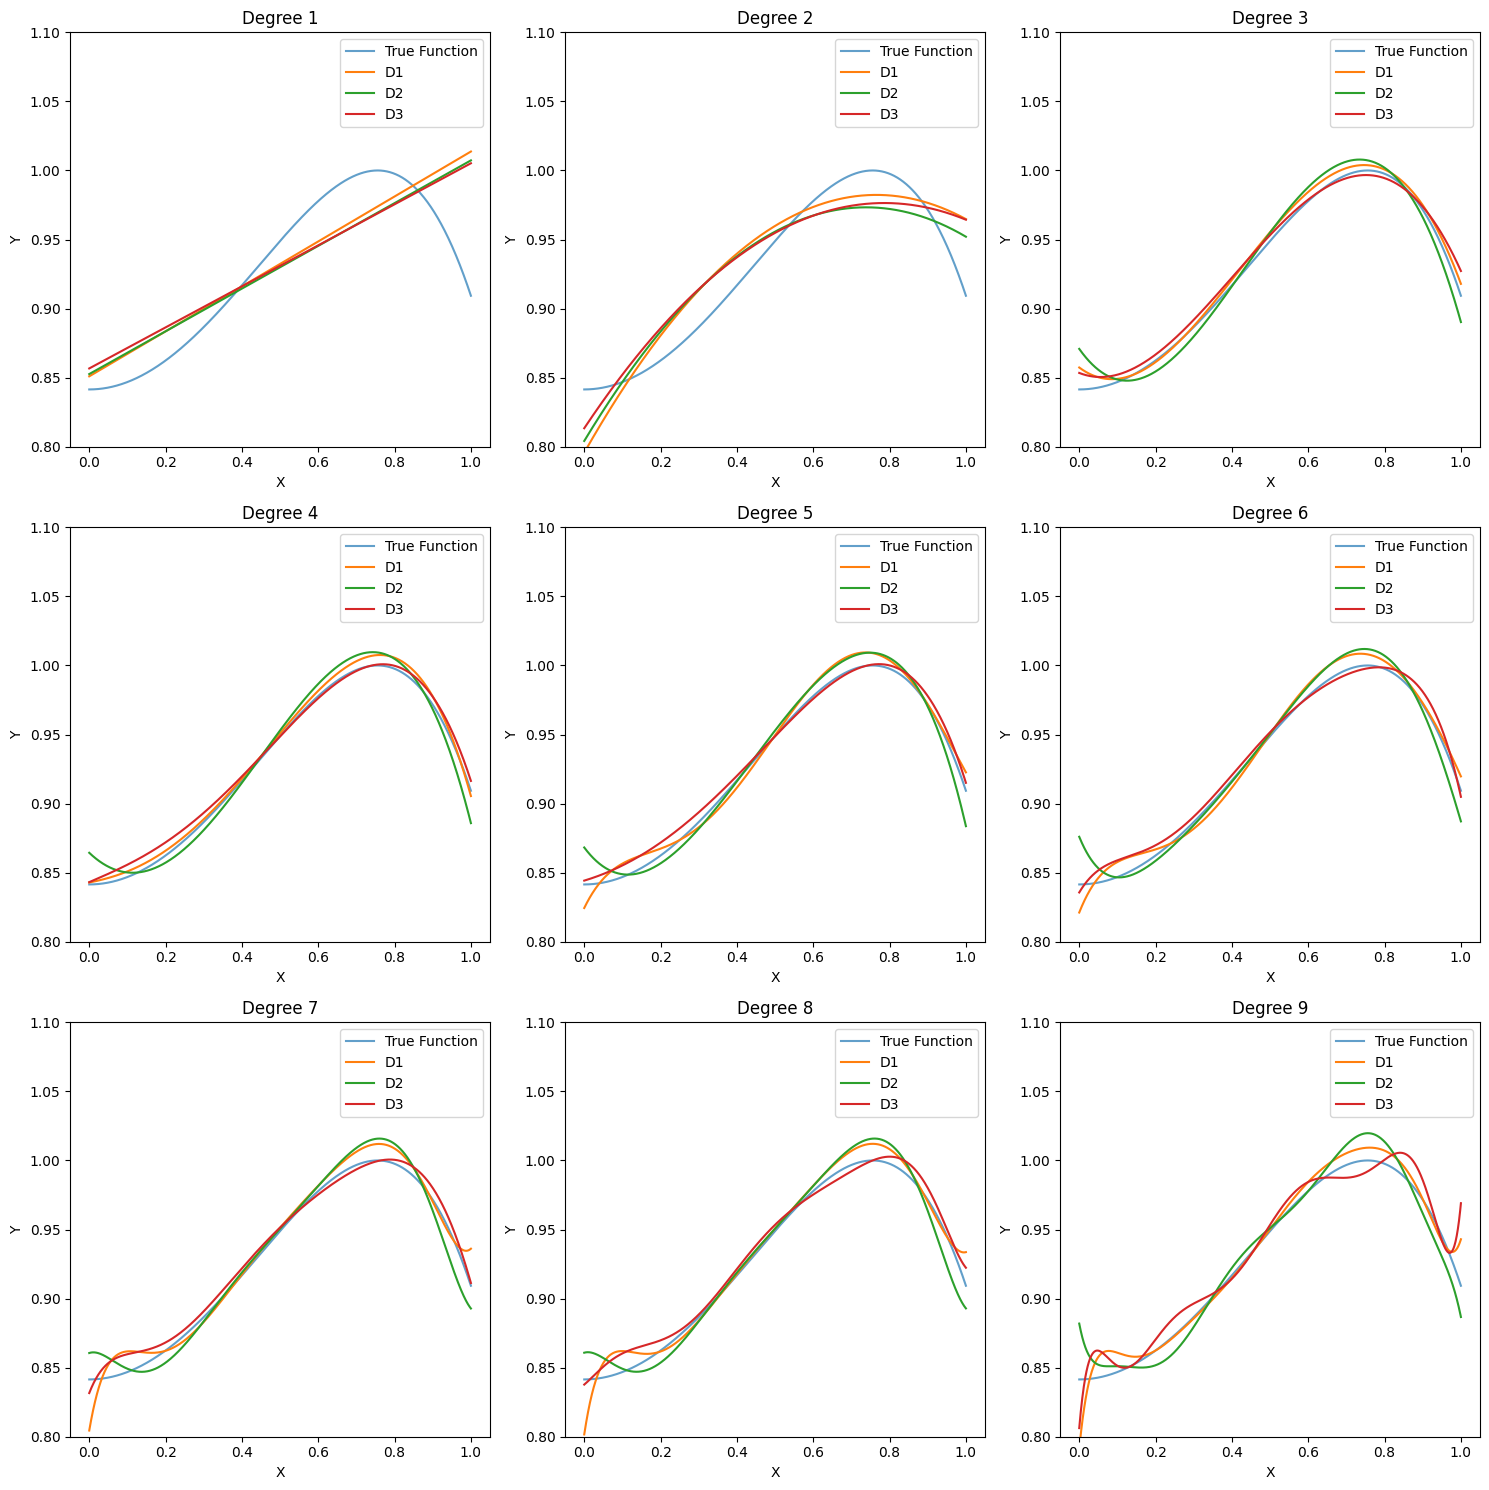

In [377]:
# Train the model with degree from 1 to 9 using D1 dataset


fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, degree in enumerate(degrees):
    row = i // 3
    col = i % 3
    

    model_1 = polynomial_regression(X_train_1, Y_train_1, degree)
    model_2 = polynomial_regression(X_train_2, Y_train_2, degree)
    model_3 = polynomial_regression(X_train_3, Y_train_3, degree)

    X_range = np.linspace(0, 1, 1000)
    X_poly_range = PolynomialFeatures(degree=degree).fit_transform(X_range.reshape(-1, 1))

    Y_pred_1 = model_1.predict(X_poly_range)
    Y_pred_2 = model_2.predict(X_poly_range)
    Y_pred_3 = model_3.predict(X_poly_range)

    axs[row, col].plot(X_range, true_func(X_range), label=f'True Function', alpha=0.7)
    axs[row, col].plot(X_range, Y_pred_1, label=f'D1')
    axs[row, col].plot(X_range, Y_pred_2, label=f'D2')
    axs[row, col].plot(X_range, Y_pred_3, label=f'D3')
    axs[row, col].set_title(f'Degree {degree}')
    axs[row, col].set_xlabel('X')
    axs[row, col].set_ylabel('Y')
    axs[row, col].legend()
    axs[row, col].set_ylim(0.8, 1.1)  # Giới hạn trục y từ 0 đến 1 cho từng subplot

plt.tight_layout()
plt.show()


# Calculate the difference between E_in[D1] and E_out[D1]

In [378]:
# Calculate D1_in/out for every degree
X_train, Y_train = D1_train
X_test, Y_test = D1_test

E_in_values = []
E_out_values = []

for degree in degrees:
    # Train the model with degree = degree
    model = polynomial_regression(X_train, Y_train, degree)
    
    # Predict the output and calculate E_in
    Y_pred_train = model.predict(PolynomialFeatures(degree=degree).fit_transform(X_train.reshape(-1, 1)))
    E_in = mean_squared_error(Y_train, Y_pred_train)
    E_in_values.append(E_in)
    
    # Predict the output and calculate E_out
    Y_pred_test = model.predict(PolynomialFeatures(degree=degree).fit_transform(X_test.reshape(-1, 1)))
    E_out = mean_squared_error(Y_test, Y_pred_test)
    E_out_values.append(E_out)

# Drawing table
import pandas as pd

results_table = pd.DataFrame({
    'Degree': degrees,
    'E_in': E_in_values,
    'E_out': E_out_values
})

print(results_table)

   Degree      E_in     E_out
0       1  0.001578  0.001281
1       2  0.001029  0.001031
2       3  0.000667  0.000750
3       4  0.000651  0.000732
4       5  0.000627  0.000698
5       6  0.000626  0.000692
6       7  0.000610  0.000729
7       8  0.000610  0.000730
8       9  0.000604  0.000724


# Experiment 3: **n=1000**

In [379]:
N = 1000

# Create three datasets
D1_train, D1_test = generate_data(N)
D2_train, D2_test = generate_data(N)
D3_train, D3_test = generate_data(N)

(X_train_1, Y_train_1), (X_test_1, Y_test_1) = D1_train, D1_test
(X_train_2, Y_train_2), (X_test_2, Y_test_2) = D2_train, D2_test
(X_train_3, Y_train_3), (X_test_3, Y_test_3) = D3_train, D3_test

# Plot the data

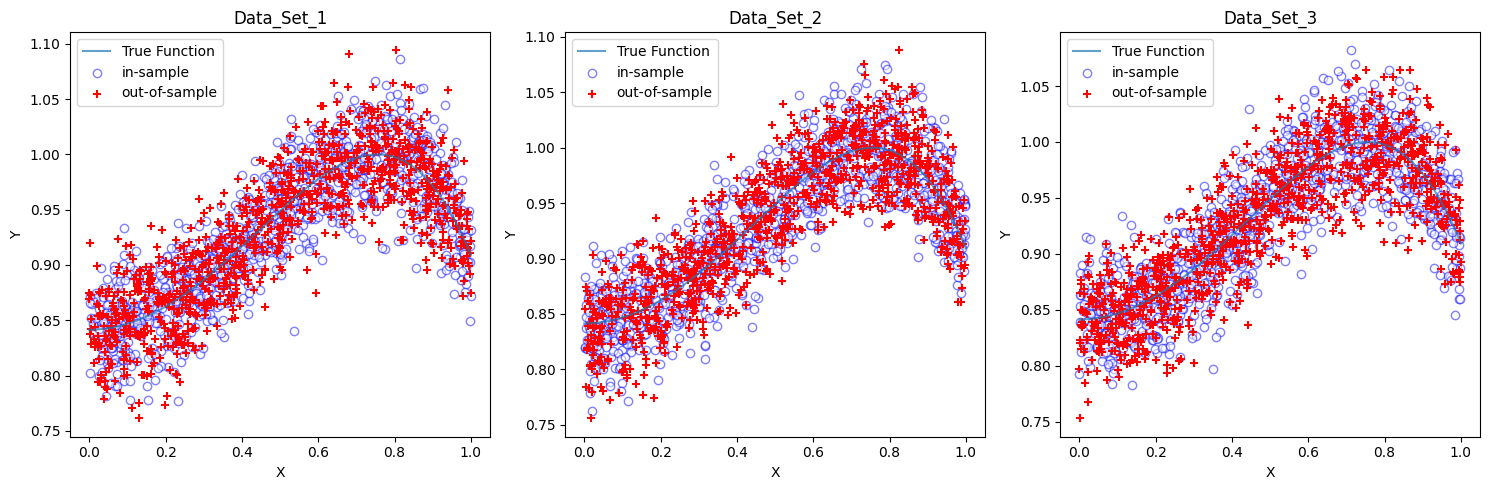

In [380]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    col = i % 3

    X_range = np.linspace(0, 1, 1000)
    axs[col].plot(X_range, true_func(X_range), label=f'True Function', alpha=0.7)

    if i == 0:
        axs[col].scatter(X_train_1, Y_train_1, label="in-sample", edgecolor='blue', color='white', alpha=0.5)
        axs[col].scatter(X_test_1, Y_test_1, label="out-of-sample", color='red', marker='+')
        axs[col].set_title(f'Data_Set_{i+1}')
    elif i == 1:
        axs[col].scatter(X_train_2, Y_train_2, label="in-sample", edgecolor='blue', color='white', alpha=0.5)
        axs[col].scatter(X_test_2, Y_test_2, label="out-of-sample", color='red', marker='+')
        axs[col].set_title(f'Data_Set_{i+1}')
    else:
        axs[col].scatter(X_train_3, Y_train_3, label="in-sample", edgecolor='blue', color='white', alpha=0.5)
        axs[col].scatter(X_test_3, Y_test_3, label="out-of-sample", color='red', marker='+')
        axs[col].set_title(f'Data_Set_{i+1}')

    axs[col].set_xlabel('X')
    axs[col].set_ylabel('Y')
    axs[col].legend()
plt.tight_layout()
plt.show()

# Predict D1, D2, D3 Dataset and plot its graph

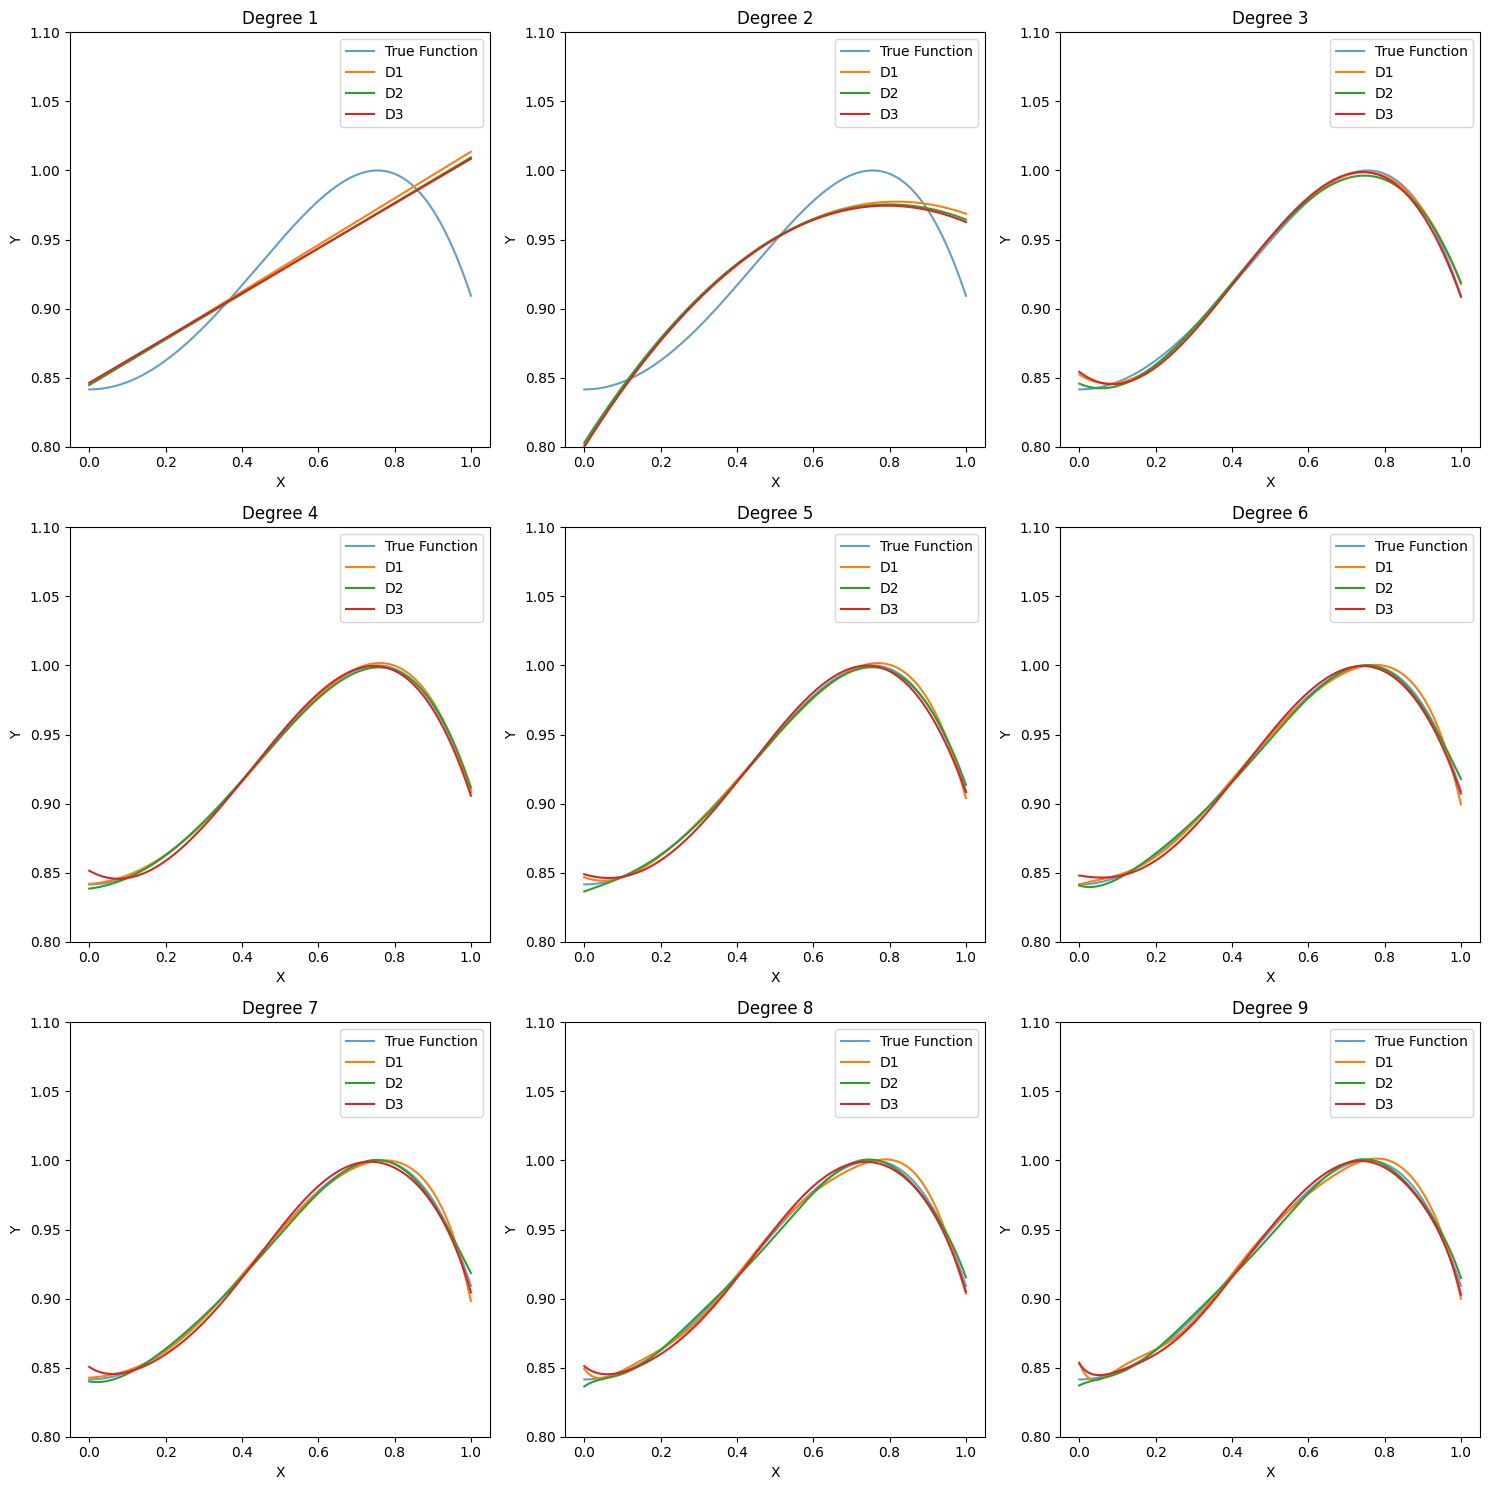

In [381]:
# Train the model with degree from 1 to 9 using D1 dataset
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, degree in enumerate(degrees):
    row = i // 3
    col = i % 3
    

    model_1 = polynomial_regression(X_train_1, Y_train_1, degree)
    model_2 = polynomial_regression(X_train_2, Y_train_2, degree)
    model_3 = polynomial_regression(X_train_3, Y_train_3, degree)

    X_range = np.linspace(0, 1, 1000)
    X_poly_range = PolynomialFeatures(degree=degree).fit_transform(X_range.reshape(-1, 1))

    Y_pred_1 = model_1.predict(X_poly_range)
    Y_pred_2 = model_2.predict(X_poly_range)
    Y_pred_3 = model_3.predict(X_poly_range)

    axs[row, col].plot(X_range, true_func(X_range), label=f'True Function', alpha=0.7)
    axs[row, col].plot(X_range, Y_pred_1, label=f'D1')
    axs[row, col].plot(X_range, Y_pred_2, label=f'D2')
    axs[row, col].plot(X_range, Y_pred_3, label=f'D3')
    axs[row, col].set_title(f'Degree {degree}')
    axs[row, col].set_xlabel('X')
    axs[row, col].set_ylabel('Y')
    axs[row, col].legend()
    axs[row, col].set_ylim(0.8, 1.1)  # Giới hạn trục y từ 0 đến 1 cho từng subplot

plt.tight_layout()
plt.show()


# Calculate the difference between E_in[D1] and E_out[D1]

In [382]:
# Calculate D1_in/out for every degree
X_train, Y_train = D1_train
X_test, Y_test = D1_test

E_in_values = []
E_out_values = []

for degree in degrees:
    # Train the model with degree = degree
    model = polynomial_regression(X_train, Y_train, degree)
    
    # Predict the output and calculate E_in
    Y_pred_train = model.predict(PolynomialFeatures(degree=degree).fit_transform(X_train.reshape(-1, 1)))
    E_in = mean_squared_error(Y_train, Y_pred_train)
    E_in_values.append(E_in)
    
    # Predict the output and calculate E_out
    Y_pred_test = model.predict(PolynomialFeatures(degree=degree).fit_transform(X_test.reshape(-1, 1)))
    E_out = mean_squared_error(Y_test, Y_pred_test)
    E_out_values.append(E_out)

# Drawing table
import pandas as pd

results_table = pd.DataFrame({
    'Degree': degrees,
    'E_in': E_in_values,
    'E_out': E_out_values
})

print(results_table)


   Degree      E_in     E_out
0       1  0.001639  0.001692
1       2  0.001255  0.001299
2       3  0.000906  0.000944
3       4  0.000896  0.000947
4       5  0.000895  0.000951
5       6  0.000893  0.000951
6       7  0.000893  0.000951
7       8  0.000892  0.000951
8       9  0.000891  0.000947


# Nhận xét
1. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến bias?

    *Trả lời:* Tăng độ phức tạp của mô hình làm giảm bias

2. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến variance?

    *Trả lời:* Tăng độ phức tạp của mô hình làm tăng variance

3. Tăng kích thước tập train ảnh hưởng thế nào đến bias?

    *Trả lời:* Tăng kích thước tập train làm giảm bias

4. Tăng kích thước tập train ảnh hưởng thế nào đến variance?

    *Trả lời:* Tăng kích thước tập train làm giảm variance